# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "..\output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [31]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the responses
city_id = []
city_name = []
country = []
temp = []
lat = []
lon = []
wind = []
cloudy = []
humidity = []


# Make a request for each of the cities
for city in cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        print("Processing city ID= " + str(response['id']) + " name: " + response['name'])
        city_id.append(response['id'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        wind.append(response['wind']['speed'])
        cloudy.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
    
    except:
        pass

print('Done')

Processing city ID= 3495137 name: Pedernales
Processing city ID= 2165087 name: Gold Coast
Processing city ID= 3874787 name: Punta Arenas
Processing city ID= 1006984 name: East London
Processing city ID= 3418910 name: Upernavik
Processing city ID= 2032614 name: Baruun-Urt
Processing city ID= 1528998 name: Yumen
Processing city ID= 737021 name: Zonguldak
Processing city ID= 2112309 name: Katsuura
Processing city ID= 2206939 name: Bluff
Processing city ID= 1275812 name: Bhuj
Processing city ID= 6089245 name: Norman Wells
Processing city ID= 2075265 name: Busselton
Processing city ID= 5106841 name: Albany
Processing city ID= 3369157 name: Cape Town
Processing city ID= 3833367 name: Ushuaia
Processing city ID= 2137773 name: Vao
Processing city ID= 3919085 name: Coroico
Processing city ID= 6201424 name: Mataura
Processing city ID= 3652764 name: Puerto Ayora
Processing city ID= 1015776 name: Bredasdorp
Processing city ID= 2122783 name: Katangli
Processing city ID= 2121385 name: Severo-Kuril's

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
# create dataframe
weather_dict = {
    "city_ID": city_id,
    "City": city_name,
    "Country": country,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "wind": wind,
    "cloudiness": cloudy,
    "humidity": humidity
}
weather_data = pd.DataFrame(weather_dict)

#export the city data to a .csv
weather_data.to_csv(output_data_file)

weather_data


,city_ID,City,Country,lat,lon,temp,wind,cloudiness,humidity
0,3495137,Pedernales,DO,18.04,-71.74,20.50,0.71,51,82
1,2165087,Gold Coast,AU,-28.00,153.43,25.47,8.70,75,53
2,3874787,Punta Arenas,CL,-53.15,-70.92,8.95,10.30,71,66
3,1006984,East London,ZA,-33.02,27.91,18.56,9.00,22,78
4,3418910,Upernavik,GL,72.79,-56.15,-27.96,4.08,0,50
...,...,...,...,...,...,...,...,...,...
571,3372760,Praia da Vitória,PT,38.73,-27.07,16.00,6.91,40,82
572,3388847,São Félix do Xingu,BR,-6.64,-51.99,21.85,0.93,67,97
573,3980627,Valle de Allende,MX,26.93,-105.40,17.54,2.85,33,48
574,98182,Baghdad,IQ,33.34,44.40,14.00,2.10,27,82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

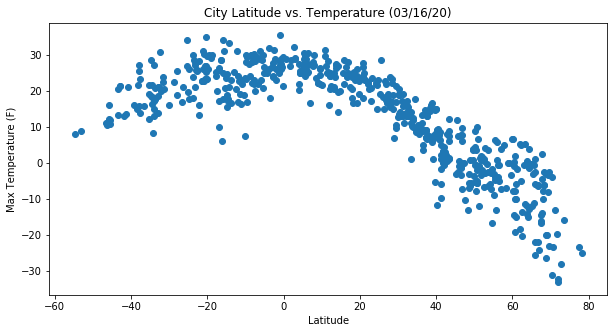

The temparature increase as we move towards the equator,and then starts to decrease as we go north from the equator.


In [115]:
#Latitude vs. Temperature Plot
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Temperature (' + date.today().strftime("%m/%d/%y") + ")")
plt.savefig('..\output_data\Latitude_Temperature.png')
plt.show()

print("The temparature increase as we move towards the equator,and then starts to decrease as we go north from the equator.")

#### Latitude vs. Humidity Plot

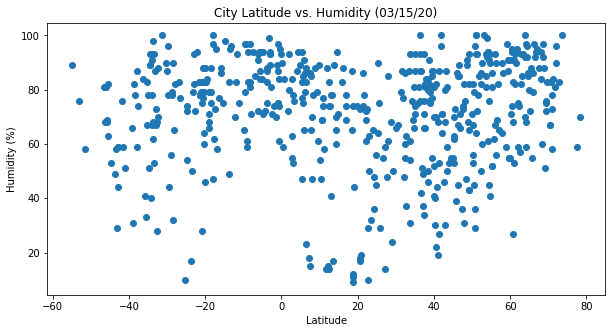

Humidity does not fluctuate much with latitue. There are humid cities in both southern and northern cities.


In [10]:
#Latitude vs. Humidity Plot
x_values = weather_data['lat']
y_values = weather_data['humidity']
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (' + date.today().strftime("%m/%d/%y") + ")")
plt.savefig('..\output_data\Latitude_Humidity.png')
plt.show()

print("Humidity does not fluctuate much with latitue. There are humid cities in both southern and northern cities.")


#### Latitude vs. Cloudiness Plot

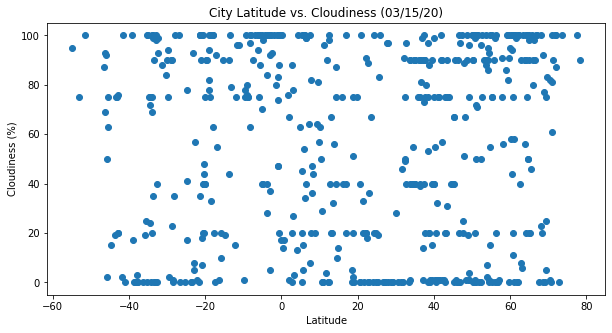

The cloudiness vs. latitude does not show any conclusive relationship between the two variable


In [11]:
#Latitude vs. Cloudiness Plot
x_values = weather_data['lat']
y_values = weather_data['cloudiness']
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (' + date.today().strftime("%m/%d/%y") + ")")
plt.savefig('..\output_data\Latitude_Cloudiness.png')
plt.show()

print("The cloudiness vs. latitude does not show any conclusive relationship between the two variable")


#### Latitude vs. Wind Speed Plot

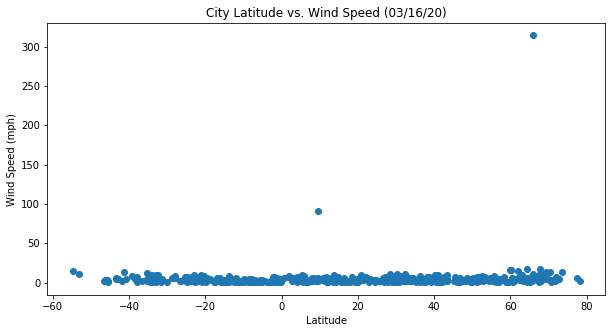

wind speed vs. latitude does not show any conclusive relationship between the two variable


In [100]:
#Latitude vs.Wind Speed Plot
x_values = weather_data['lat']
y_values = weather_data['wind']
plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (' + date.today().strftime("%m/%d/%y") + ")")
plt.savefig('..\output_data\Latitude_Wind.png')
plt.show()

print("wind speed vs. latitude does not show any conclusive relationship between the two variable")

## Linear Regression

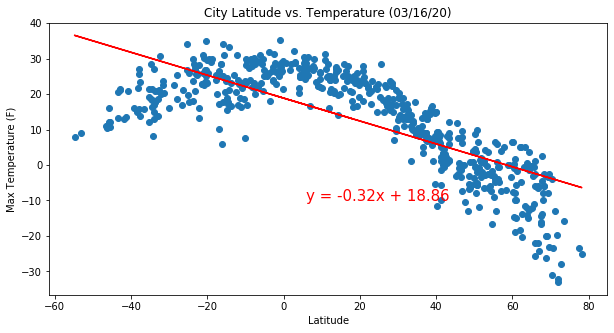

Linear equation shows slight negative correlation; as me move north towards the equator, temperates increase, and as we move north from the equator, the temperatures decrease.


In [101]:
# OPTIONAL: Create a function to create Linear Regression plots
#Latitude vs. Temperature Plot
x_values = weather_data['lat']
y_values = weather_data['temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.title('City Latitude vs. Temperature (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\Latitude_Temperature_Regression.png')

# Show plot
plt.show()

print("Linear equation shows slight negative correlation; as me move north towards the equator, temperates increase, and as we move north from the equator, the temperatures decrease.")

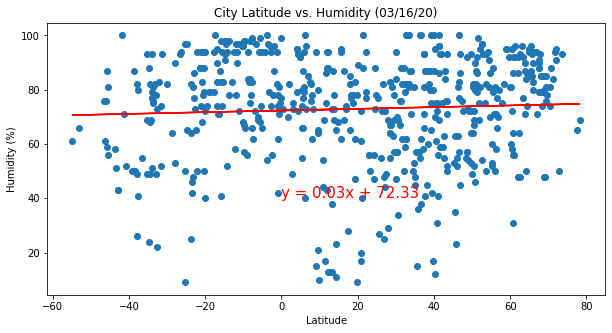

the Latitude and humidity have a fairly flat correlation. Both Southern and Northern hemisphere have high humidty cities


In [102]:
#Linear Regression
#Latitude vs. Humidity Plot
x_values = weather_data['lat']
y_values = weather_data['humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\Latitude_Humidity_Regression.png')

# Show plot
plt.show()

print("the Latitude and humidity have a fairly flat correlation. Both Southern and Northern hemisphere have high humidty cities")

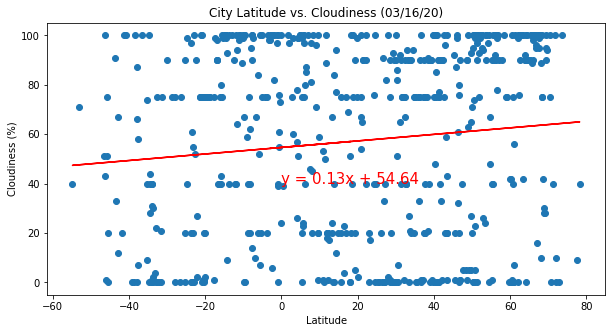

The city cloudiness increase as move from low latitudes to high latitude cities, but not a sharp increase.


In [103]:
#Linear Regression
#Latitude vs. Cloudiness Plot
x_values = weather_data['lat']
y_values = weather_data['cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0, 40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\Latitude_Cloudiness_Regression.png')

# Show plot
plt.show()

print("The city cloudiness increase as move from low latitudes to high latitude cities, but not a sharp increase.")


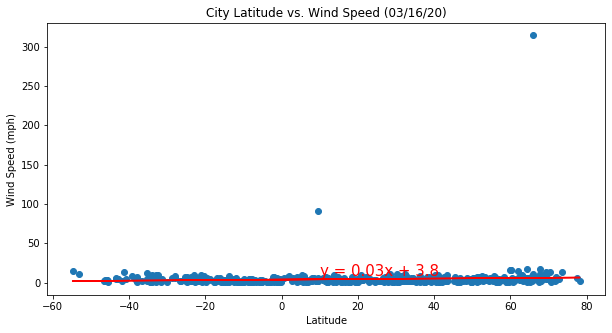

wind speed correlation with latitude is quite low. It shows as a fairly flat line.


In [104]:
#Linear Regression
#Latitude vs. Wind Speed Plot
x_values = weather_data['lat']
y_values = weather_data['wind']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\Latitude_Wind_Regression.png')

# Show plot
plt.show()

print("wind speed correlation with latitude is quite low. It shows as a fairly flat line.")


In [105]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_data.loc[weather_data['lat'] >= 0]
south = weather_data.loc[weather_data['lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

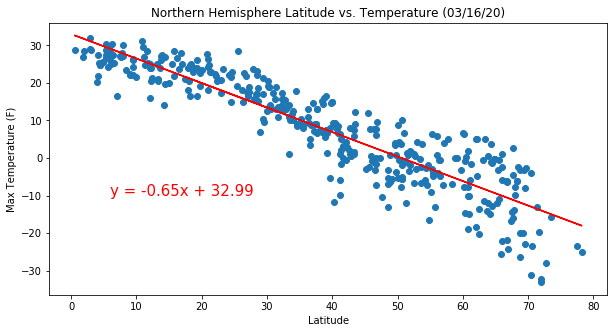

There is a strong negative correlation between temperature and latitude in the Northern hemisphere. It means as we move north from the equator, we have colder cities.


In [106]:
#Northern Hemisphere
#Latitude vs. Temperature Linear Regression

x_values = north['lat']
y_values = north['temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.title('Northern Hemisphere Latitude vs. Temperature (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\hemisphere_northern_Lat_Temp_Regression.png')

# Show plot
plt.show()

print("There is a strong negative correlation between temperature and latitude in the Northern hemisphere. It means as we move north from the equator, we have colder cities.")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

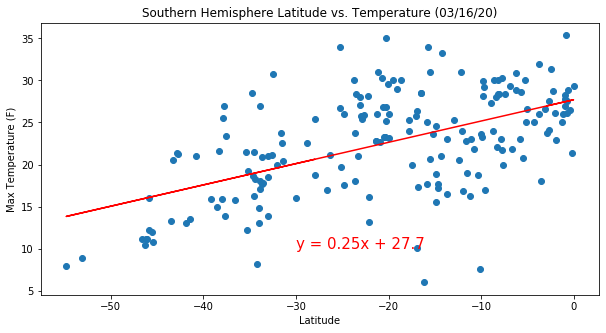

In the Souther hemisphere, as we move north towards the equators, temperatures increase. The linear model shows a positive correlation.


In [107]:
#Southern Hemisphere
#Latitude vs. Temperature Linear Regression

x_values = south['lat']
y_values = south['temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.title('Southern Hemisphere Latitude vs. Temperature (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\hemisphere_Southern_Lat_Temp_Regression.png')

# Show plot
plt.show()

print("In the Souther hemisphere, as we move north towards the equators, temperatures increase. The linear model shows a positive correlation.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

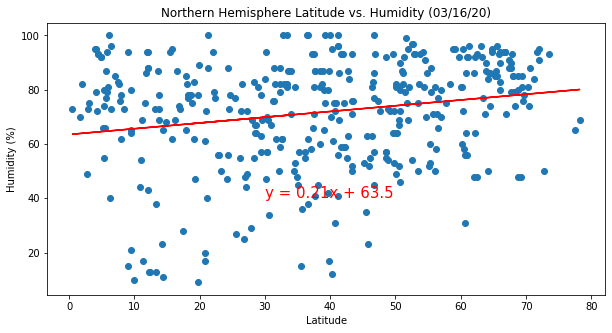

In Northern hemisphere, there is a very small positive correlation between latitude and humidity; but overall most cities in the Northern hemisphere seem to have high humidity.


In [108]:
#Northern Hemisphere
#Latitude vs. Humidity Linear Regression

x_values = north['lat']
y_values = north['humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.title('Northern Hemisphere Latitude vs. Humidity (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\hemisphere_northern_Lat_Humidity_Regression.png')

# Show plot
plt.show()

print("In Northern hemisphere, there is a very small positive correlation between latitude and humidity; but overall most cities in the Northern hemisphere seem to have high humidity.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

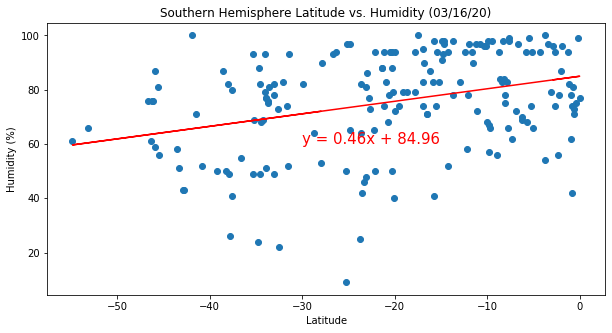

In the Southern hemisphere, humid cities seem to be located in the northern part closer to the equator.


In [109]:
#Southern Hemisphere
#Latitude vs. Humidity Linear Regression

x_values = south['lat']
y_values = south['humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.title('Southern Hemisphere Latitude vs. Humidity (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\hemisphere_southern_Lat_Humidity_Regression.png')

# Show plot
plt.show()

print("In the Southern hemisphere, humid cities seem to be located in the northern part closer to the equator.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

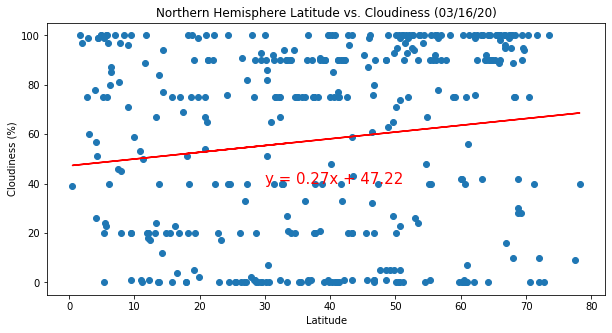

In the Northern hemisphere, there is a very small correlation between latitude and cloudiness. 


In [110]:
#Northern Hemisphere
#Latitude vs. Cloudiness Linear Regression
x_values = north['lat']
y_values = north['cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Latitude vs. Cloudiness (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\hemisphere_northern_Lat_Cloud_Regression.png')

# Show plot
plt.show()

print("In the Northern hemisphere, there is a very small correlation between latitude and cloudiness. ")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

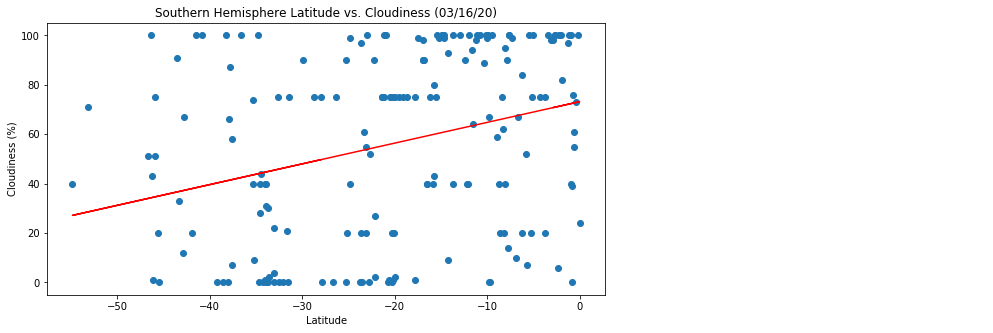

In the Southern hemosphere, cities closer to the equator seem to have more cloudiness.


In [111]:
#Southern Hemisphere
#Latitude vs. Cloudiness Linear Regression
x_values = south['lat']
y_values = south['cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Latitude vs. Cloudiness (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\hemisphere_southern_Lat_Cloud_Regression.png')

# Show plot
plt.show()

print("In the Southern hemosphere, cities closer to the equator seem to have more cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

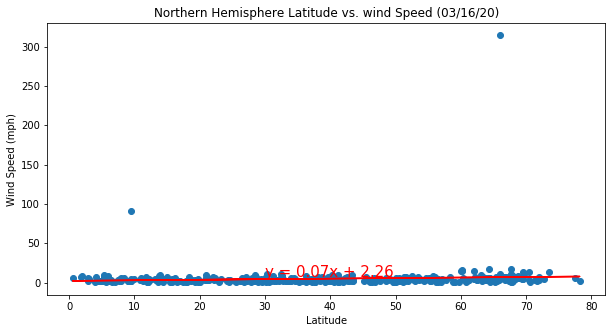

In the Northern hemisphere, there is very small correlation between wind speed and latitude. Wind speeds are quite similar acress the hemisphere, with a few high wind cities in the north.


In [112]:
#Northern Hemisphere
#Latitude vs. Wind Speed Linear Regression
x_values = north['lat']
y_values = north['wind']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Latitude vs. wind Speed (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\hemisphere_northern_Lat_Wind_Regression.png')

# Show plot
plt.show()

print("In the Northern hemisphere, there is very small correlation between wind speed and latitude. Wind speeds are quite similar acress the hemisphere, with a few high wind cities in the north.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

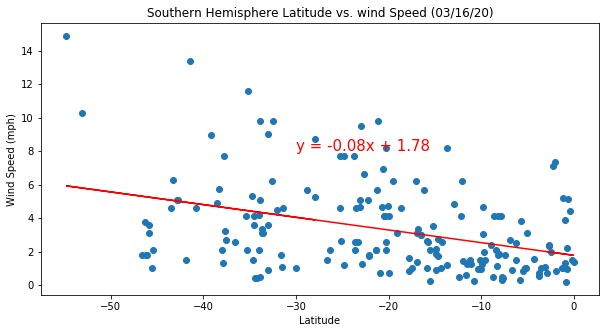

In the Souther hemisphere, the correlation between latitude and wind speed is very low negative. As we move north towards the equator, wind speed slightly decreases.


In [113]:
#Southern Hemisphere
#Latitude vs. Wind Speed Linear Regression
x_values = south['lat']
y_values = south['wind']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,5))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Latitude vs. wind Speed (' + date.today().strftime("%m/%d/%y") + ")")

plt.savefig('..\output_data\hemisphere_southern_Lat_Wind_Regression.png')

# Show plot
plt.show()

print("In the Souther hemisphere, the correlation between latitude and wind speed is very low negative. As we move north towards the equator, wind speed slightly decreases.")